## Imports

In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [2]:
airlines = pd.read_csv('combined.csv')

## Data Cleaning

In [3]:
#change to lower case
airlines['lemmatized'] = airlines['text'].str.lower()

# remove punctuation and urls
airlines['lemmatized'].replace(to_replace=r"[^\w\d'\s]",value='',regex=True, inplace=True)

#remove numbers
airlines['lemmatized'].replace(to_replace=r"\d+", value='',regex=True, inplace=True)

In [4]:
# tokenize the text by splitting (leaving apostrophe to be used in remove stop words)
airlines['lemmatized'] = airlines['lemmatized'].str.split()

In [5]:
#remove stop words
add = ["i'm", "i've","airlines","airline","flight","united","amp","u","im","ua","pm","ual","spotted","boeing",
       "mi","away","unknown"]
to_remove = (stopwords.words("english")) + add
airlines['lemmatized'] = airlines['lemmatized'].apply(lambda x: [item for item in x if item not in to_remove])

In [6]:
#remove apostrophes
airlines['lemmatized'].replace(to_replace="'", value = '', inplace = True, regex = True)

In [7]:
# Stem the text

lemmatizer = WordNetLemmatizer()

def lem_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

airlines['lemmatized'] = airlines['lemmatized'].apply(lem_text)

airlines['clean'] = airlines['lemmatized'].apply(' '.join)

## Ploting a Word Cloud

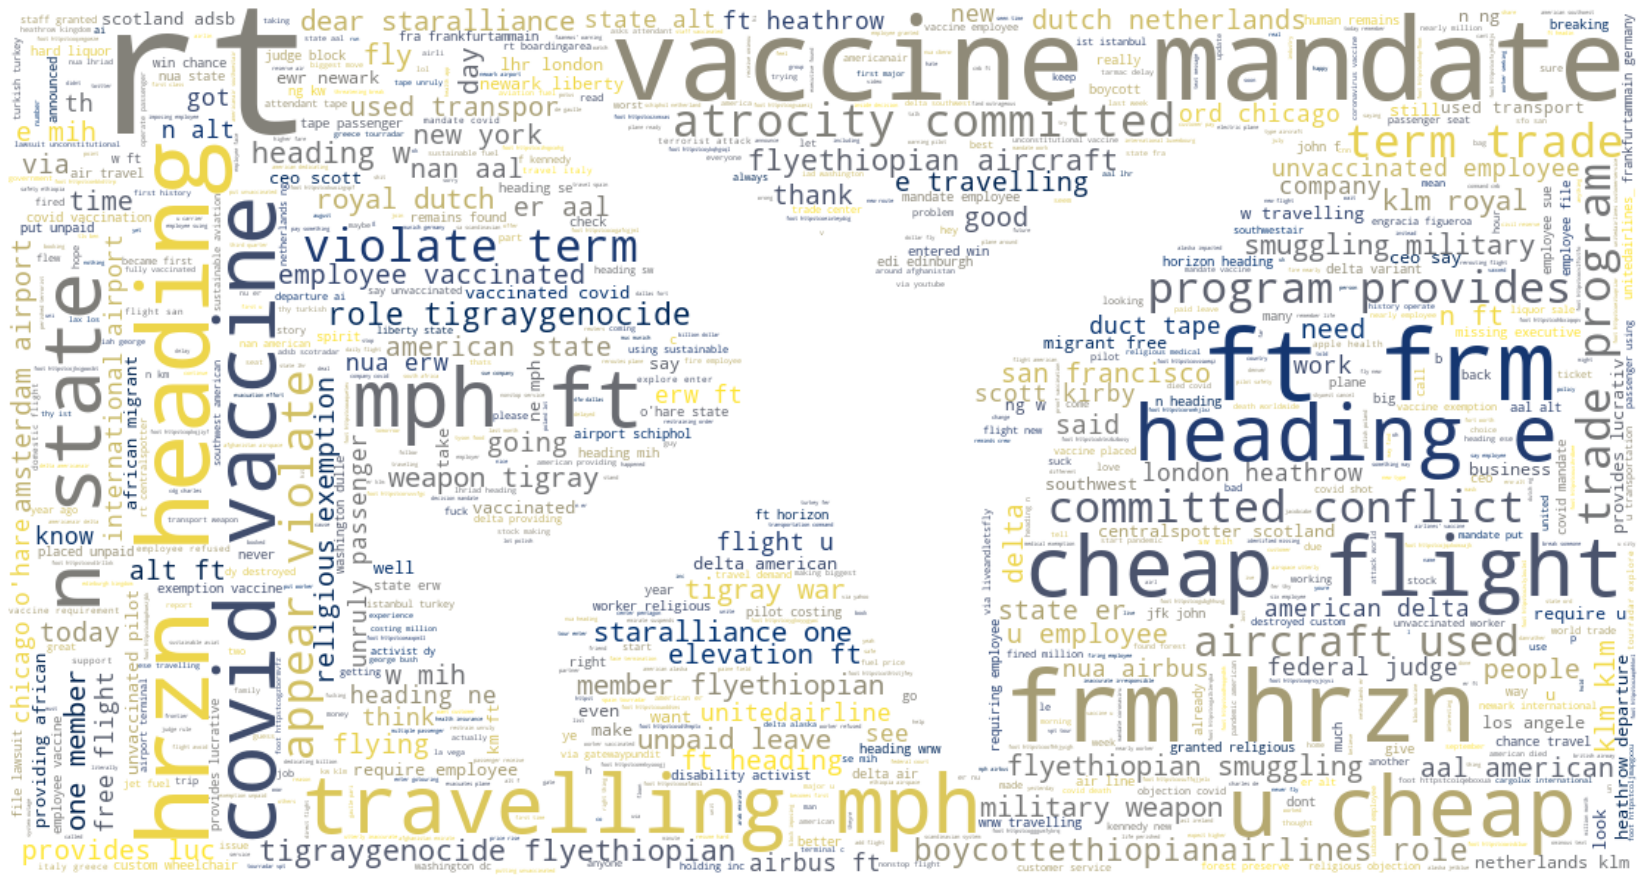

In [12]:
# Generate a word cloud image
mask = np.array(Image.open("airplane.png"))
plane_text = " ".join(review for review in airlines.clean) 
wordcloud_plane = WordCloud(background_color="white", mode="RGBA", max_words=2000, width=1210, height=590, mask=mask).generate(plane_text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[32,16])
plt.imshow(wordcloud_plane.recolor(colormap='cividis'), interpolation="bilinear")
plt.axis("off")
plt.savefig('wordcloud.png', pad_inches=0.0, dpi=500)
plt.show()